# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.2: SARSA Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [14]:
class SarsaAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(SarsaAgent, self).__init__(actions)
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.Q = {}
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        ## action = np.random.randint(0, self.num_actions) 
        ## TODO 2
        ## Implement epsilon greedy policy here
        if np.random.random() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            q = [self.Q.get((stateStr,a),0.0) for a in self.actions]
            best_action = np.argmax(q)
            action = self.actions[best_action]
        return action

    def learn(self, state1, action1, reward, state2, action2):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the sarsa update here
        Q_state = self.Q.get((state1Str,action1),0.0)
        Q_statePrime = self.Q.get((state2Str,action2),0.0)
        td_target = reward +self.gamma*Q_statePrime
        td_delta = td_target - Q_state
        Q_current = Q_state + self.alpha*td_delta
        self.Q[(state1Str,action1)] = Q_current
        """
        SARSA Update
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * Q(s',a') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

<IPython.core.display.Javascript object>


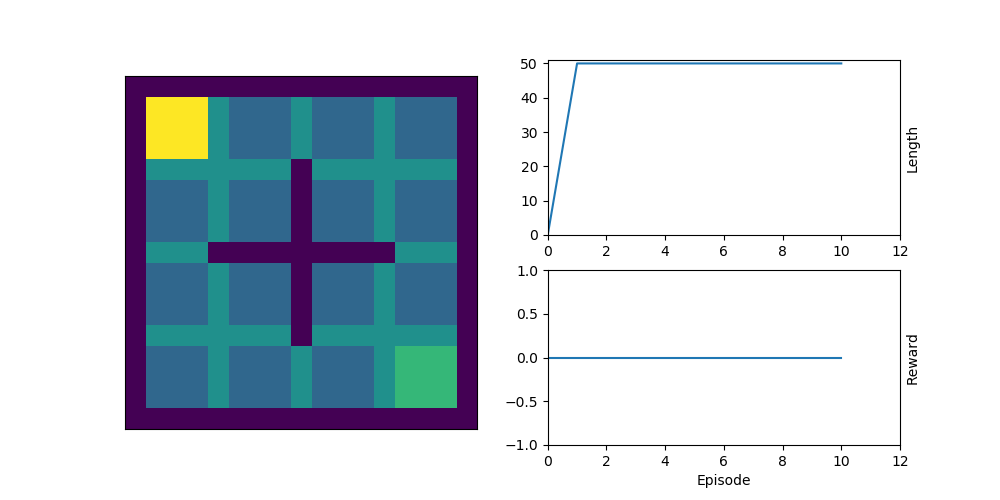

In [15]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(10, interactive)

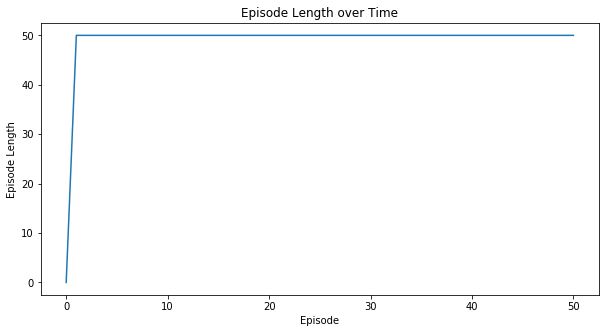

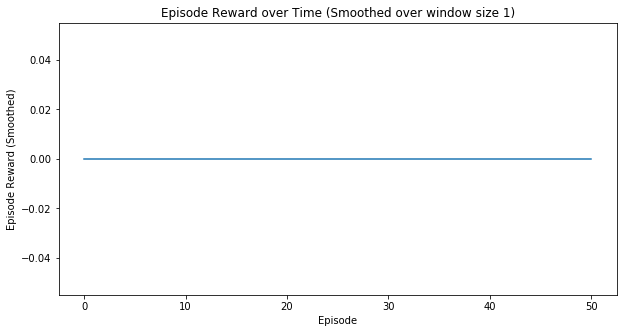

In [16]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)

<IPython.core.display.Javascript object>


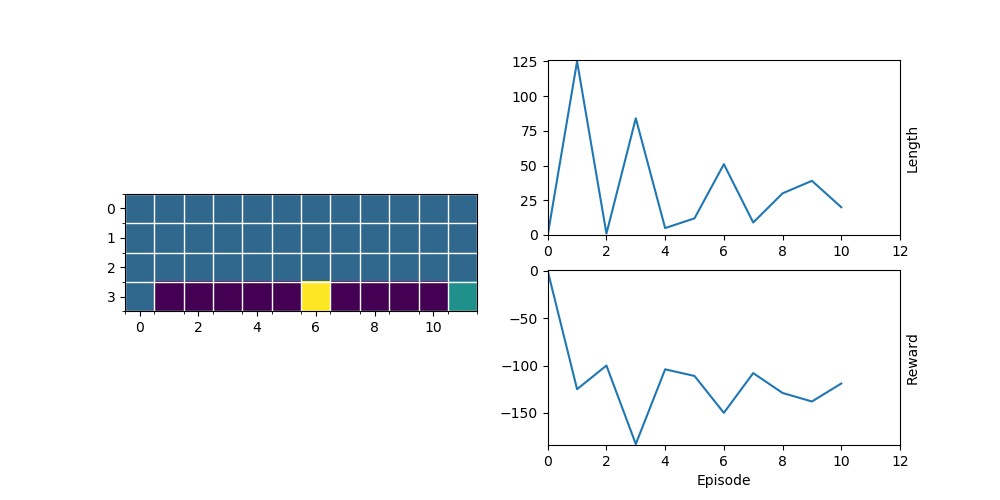

In [17]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(10, interactive)

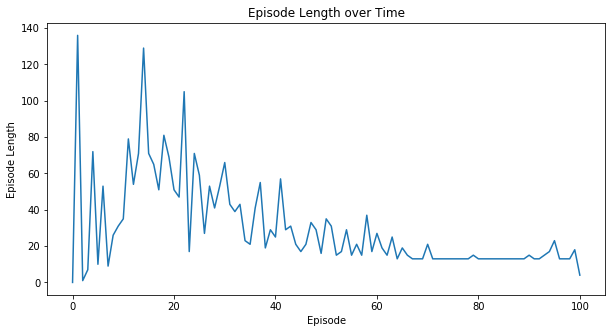

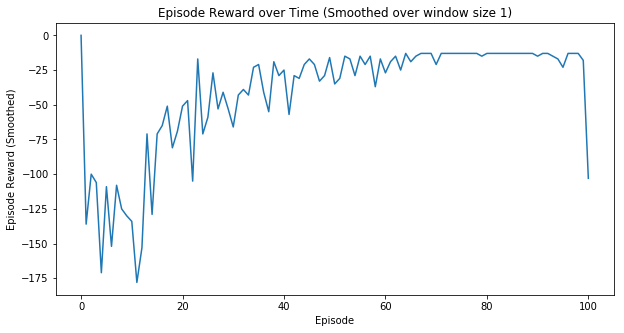

In [18]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(100, interactive)

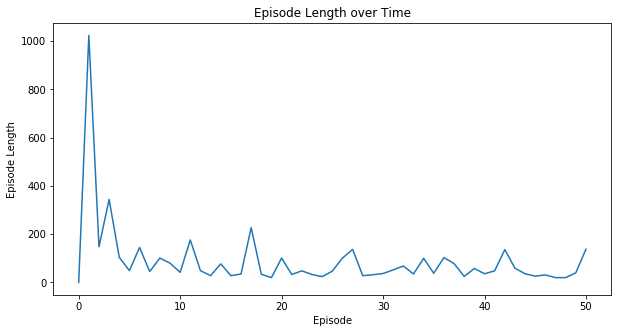

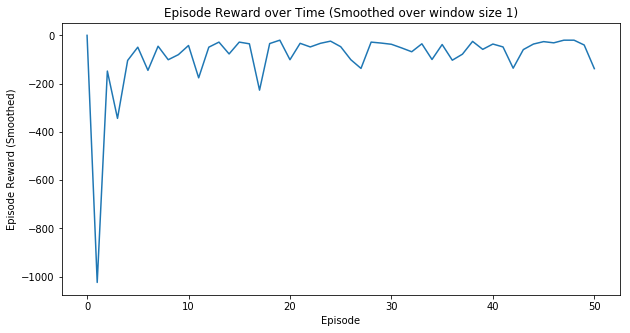

In [19]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)